<a href="https://colab.research.google.com/github/lorenzomazzante/Cardiovascular-Disease-Prediction/blob/main/Dataset_visualizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [84]:
data = pd.read_csv('dataset.csv')

In [85]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110.0,80.0,1,1,0,0,1,0
1,1,20228,1,156,85.0,140.0,90.0,3,1,0,0,1,1
2,2,18857,1,165,64.0,130.0,70.0,3,1,0,0,0,1
3,3,17623,2,169,82.0,150.0,100.0,1,1,0,0,1,1
4,4,17474,1,156,56.0,100.0,60.0,1,1,0,0,0,0


In [86]:
data.shape

(70000, 13)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  float64
 6   ap_lo        70000 non-null  float64
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 6.9 MB


In [88]:
data = data.drop(columns=['id'])
data['age'] = (data['age'] / 365).astype(int)

In [89]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110.0,80.0,1,1,0,0,1,0
1,55,1,156,85.0,140.0,90.0,3,1,0,0,1,1
2,51,1,165,64.0,130.0,70.0,3,1,0,0,0,1
3,48,2,169,82.0,150.0,100.0,1,1,0,0,1,1
4,47,1,156,56.0,100.0,60.0,1,1,0,0,0,0


In [93]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68990.000000,68990.000000,68990.000000,68990.000000,68990.000000,68990.000000,68990.000000,68990.000000,68990.000000,68990.000000,68990.000000,68990.000000
mean,52.826482,1.348717,164.364618,74.123408,126.323105,81.334048,1.364401,1.225888,0.087868,0.053587,0.803276,0.494869
std,6.769514,0.476568,8.172630,14.320878,17.709194,9.873125,0.678725,0.571844,0.283105,0.225203,0.397525,0.499977
min,29.000000,1.000000,60.000000,30.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
data = data[
    (data['weight'] >= 30) &
    (data['height'] >= 60) &
    (data['ap_hi'] <= 300) &
    (data['ap_lo'] <= 300) &
    (data['ap_hi'] >= 0) &
    (data['ap_lo'] >= 0)
]

In [94]:
data_train, data_test = train_test_split(data, train_size=10000, random_state=10, shuffle=True)

Ytrain = data_train['cardio']
Xtrain = data_train.drop(columns=['cardio'])

Ytest = data_test['cardio']
Xtest = data_test.drop(columns=['cardio'])

print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(10000, 11)
(10000,)
(58990, 11)
(58990,)


In [95]:
def plot_2d_by_label(df, x_col, y_col, label_col='cardio'):
    """
    Grafica dos variables (x_col vs y_col) coloreadas según la clase (label_col).
    df: DataFrame con los datos
    x_col, y_col: nombres de las columnas a graficar
    label_col: nombre de la columna de clase (por defecto 'cardio')
    """
    labels = tuple(sorted(df[label_col].unique()))
    mask_a = df[label_col] == labels[0]
    mask_b = df[label_col] == labels[1]

    fig, ax = plt.subplots(figsize=(7.5, 7))
    ax.scatter(df.loc[mask_a, x_col], df.loc[mask_a, y_col],
               marker='*', s=150, label=f'{label_col} = {labels[0]}', color='purple')
    ax.scatter(df.loc[mask_b, x_col], df.loc[mask_b, y_col],
               marker='o', s=70, label=f'{label_col} = {labels[1]}', color='orange', alpha=0.8)
    ax.set_xlabel(x_col, fontsize=16)
    ax.set_ylabel(y_col, fontsize=16)
    ax.legend(fontsize=12)
    ax.grid(True)
    plt.show()

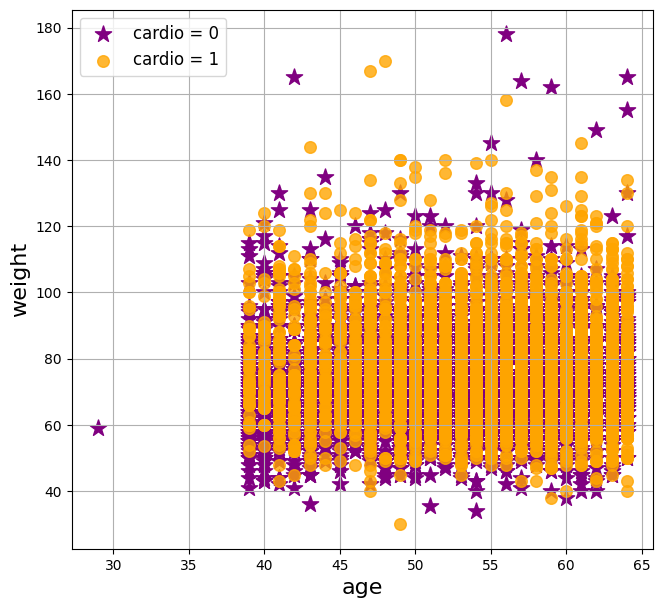

In [96]:
plot_2d_by_label(data_train, 'age', 'weight')

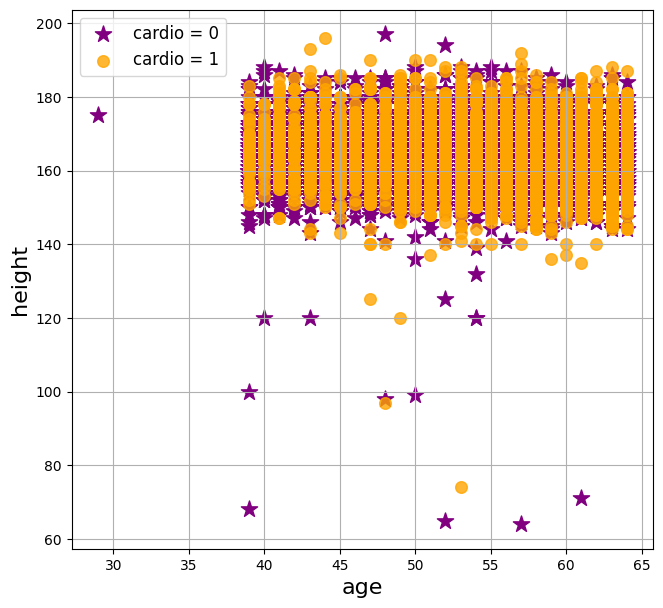

In [97]:
plot_2d_by_label(data_train, 'age', 'height')

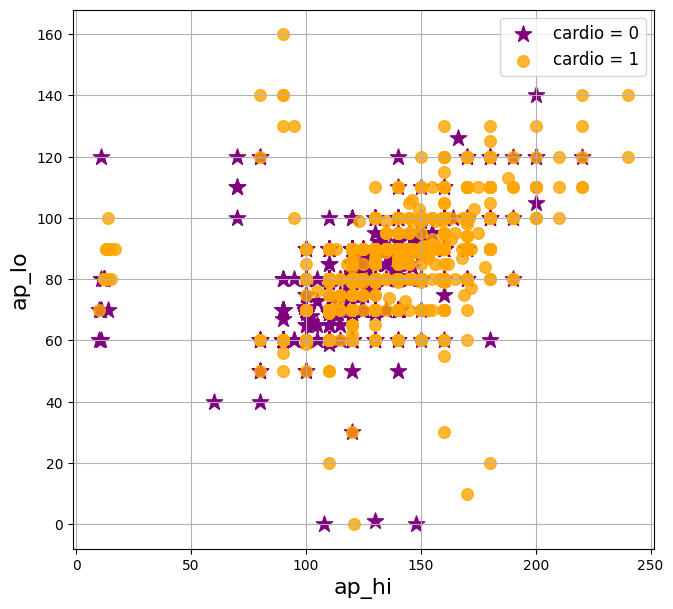

In [98]:
plot_2d_by_label(data_train, 'ap_hi', 'ap_lo')

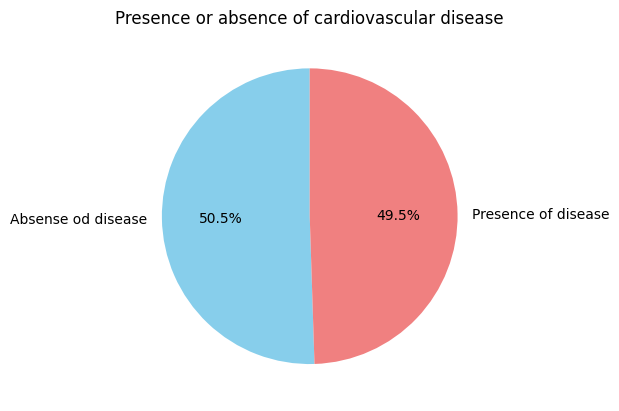

In [100]:
# Calcular conteo
conteo = data['cardio'].value_counts()

# Crear gráfico
plt.pie(conteo, labels=['Absense od disease', 'Presence of disease'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Presence or absence of cardiovascular disease')
plt.show()